# TAREA 4. Descenso por Gradiente
### Equipo 11. 
- Iñaki Fernández Fiscal
- Mauricio Vázquez Moran
- Guillermo Arredondo Renero

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.animation as animation
from matplotlib import rc
import pandas as pd
from sklearn.model_selection import train_test_split

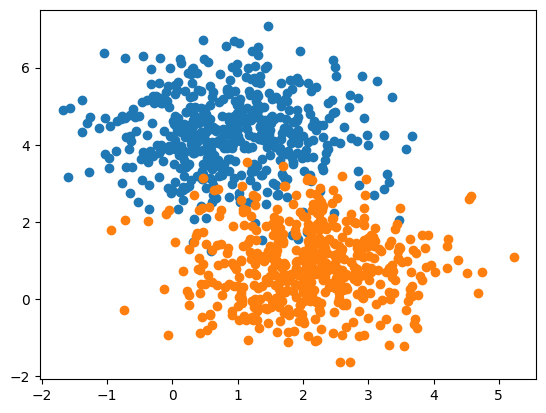

In [3]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
X[:5], y[:5]
y = np.array(list(map(lambda x: -1 if x==0 else x, y)))
fig, ax = plt.subplots()
for label in [-1,1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])
ejeX = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
def validate(theta,theta_0,x,y):
    n = len(y)
    list_classification=[]
    for j in range (0,n,1):
        dot_product=(np.dot(x[j],theta)+theta_0)
        if y[j]*dot_product<=0:
            list_classification.append(0)
    return len(list_classification)/len(x)


In [6]:
def hinge_loss(z):
    if z>=1:
        return 0
    else:
        return 1-z

In [7]:
def funcion_objetivo(X, y, theta,theta_0,lam):
    suma = 0
    n = len(X)
    for i in range(n):
        x_i = X[i]
        suma +=hinge_loss(y[i]*(np.dot(theta.T,x_i)+theta_0))
    res=(1/n)*suma+(lam/2)*np.square((np.linalg.norm(theta)))

    return res

In [8]:
def SVMGD(X, y, theta_init,theta0_init,etha,J,lam = 1):
    theta=theta_init.reshape(-1,1)
    theta_0=theta0_init
    tol=1e-4
    thetas=[]
    bandera=1
    y=y.reshape(-1,1)
    n = X.shape[0]
    t = 0
    while(bandera>=tol):
        aux_theta = 0
        aux_0 = 0
        for i in range(n):
            x_i = X[i].reshape(-1,1)
            y_i=y[i].reshape(-1,1)
            if y_i*(np.dot(theta.T,x_i)+theta_0) < 1:
                a = -1
            else:
                a = 0
            aux_theta += a*np.dot(x_i,y_i)
            aux_0 += a*y[i]

        theta_new = theta - etha*((1/n)*aux_theta+lam*theta)
        theta_0_new = theta_0 -etha*((1/n)*aux_0)
        thetas.append([theta_new, theta_0_new])
        t = t+1
        bandera=abs(J(X, y, theta_new,theta_0_new,lam)-J(X, y, theta,theta_0,lam))
        theta = theta_new
        theta_0 = theta_0_new
    return thetas



In [9]:
def SGD(X, y, theta_init, theta0_init, etha, lam = 1,T = 50):
    theta=theta_init.reshape(-1,1)
    theta_0=theta0_init
    thetas=[]
    n=len(X)
    y = y.reshape(-1,1)
    i_s=[]
    for t in range(T):
        i = np.random.randint(0, n)
        while ( i in i_s):
            i = np.random.randint(0, n)
        i_s.append(i)
        x_i = X[i].reshape(-1,1)
        y_i=y[i].reshape(-1,1)
        
        if y_i*(np.dot(theta.T, x_i)+theta_0) < 1:
            a = -1
        else:
            a = 0

        theta_new = theta - etha*((1/n)*a*np.dot(x_i,y_i)+lam*theta)
        theta_0_new = theta_0 -etha*((1/n)*a*y[i])
        thetas.append([theta_new, theta_0_new])
        theta_0=theta_0_new
        theta=theta_new
        etha = etha/(t+1)
    return thetas

In [10]:
def cross_validation(X, y, k, train):
    full = np.hstack((X, y.reshape(-1,1)))
    chunks = np.array_split(full,k)
    errors=[]
    lam_list = np.linspace(0,2,100)
    min_error = np.inf
    for i, chunk in enumerate(chunks):
        if i == 0:
            training_set = chunks[1:]
        elif i == 4:
            training_set = chunks[:4]
        else:
            training_set = np.vstack((chunks[:i], chunks[i+1:]))
        training_set=np.vstack(training_set)
        lam_train = np.random.choice(lam_list)

        if train != 'estocastico':
            thetas = SVMGD(training_set[:,0:2], training_set[:,2], np.zeros(training_set[:,0:2].shape[1]), 0, 0.01, funcion_objetivo, lam=lam_train)
        else:
            thetas = SGD(training_set[:,0:2], training_set[:,2],  np.zeros(training_set[:,0:2].shape[1]), 0, 0.01, lam=lam_train)
        
        val = validate(thetas[-1][0],thetas[-1][1],chunk[:,0:2],chunk[:,2])
        if val <= min_error:
            lam_op = lam_train
            min_error = val
        errors.append(val)
    return np.array(errors).mean(), lam_op

In [11]:
lambdas = [cross_validation(X_train, y_train, 5, 'normal') for i in range(10)]
errores = [i[0] for i in lambdas]
lambda_optima = lambdas[errores.index(min(errores))][1]

In [12]:
lambda_optima

0.020202020202020204

In [13]:
lambdas

[(0.048749999999999995, 1.1515151515151516),
 (0.05125, 0.9090909090909092),
 (0.0475, 0.020202020202020204),
 (0.05125, 0.9292929292929294),
 (0.05125, 0.2828282828282829),
 (0.052500000000000005, 0.4040404040404041),
 (0.05, 1.3131313131313131),
 (0.05625, 0.020202020202020204),
 (0.05125, 1.1111111111111112),
 (0.05249999999999999, 1.5151515151515154)]

In [14]:
lista_thetas= SVMGD(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.01, funcion_objetivo, lam=lambda_optima)
#lista_thetas = SGD(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.01, lam=lam_optima)

In [15]:
lista_thetas

[[array([[ 0.00613395],
         [-0.01693656]]),
  array([5.e-05])],
 [array([[ 0.01226667],
         [-0.0338697 ]]),
  array([0.0001])],
 [array([[ 0.01839814],
         [-0.05079942]]),
  array([0.00015])],
 [array([[ 0.02452838],
         [-0.06772571]]),
  array([0.0002])],
 [array([[ 0.03065738],
         [-0.08464859]]),
  array([0.00025])],
 [array([[ 0.03678514],
         [-0.10156805]]),
  array([0.0003])],
 [array([[ 0.04291166],
         [-0.11848409]]),
  array([0.00035])],
 [array([[ 0.04903695],
         [-0.13539672]]),
  array([0.0004])],
 [array([[ 0.05516099],
         [-0.15230592]]),
  array([0.00045])],
 [array([[ 0.06127062],
         [-0.16913211]]),
  array([0.0005125])],
 [array([[ 0.06747019],
         [-0.18514148]]),
  array([0.0007])],
 [array([[ 0.07375715],
         [-0.19963414]]),
  array([0.00115])],
 [array([[ 0.08013671],
         [-0.21207465]]),
  array([0.0019875])],
 [array([[ 0.08675046],
         [-0.22271432]]),
  array([0.003175])],
 [array

In [16]:
def normaliza_linea(lista_thetas):
    for item in lista_thetas:
        item.append(item[0][1])
        item[1] = -item[1]/item[0][1]
        item[0] = -item[0][0]/item[0][1]


    return(lista_thetas)

lista_thetas = normaliza_linea(lista_thetas)


line, = ax.plot([], [], 'k-')
margen1, = ax.plot([], [], 'k--')
margen2, = ax.plot([], [], 'k--')
def anima(i):
    separadorY = lista_thetas[i][1] + lista_thetas[i][0] * ejeX
    margen1Y = lista_thetas[i][1] + lista_thetas[i][0] * ejeX + (1/lista_thetas[i][2])
    margen2Y = lista_thetas[i][1] + lista_thetas[i][0] * ejeX - (1/lista_thetas[i][2])
    line.set_data(ejeX,separadorY)
    margen1.set_data(ejeX,margen1Y)
    margen2.set_data(ejeX,margen2Y)
    return line,  margen1,  margen2,

animacion = animation.FuncAnimation(fig, anima, frames=range(len(lista_thetas)), interval=100, blit=True)

In [ ]:
rc('animation', html='jshtml')
animacion

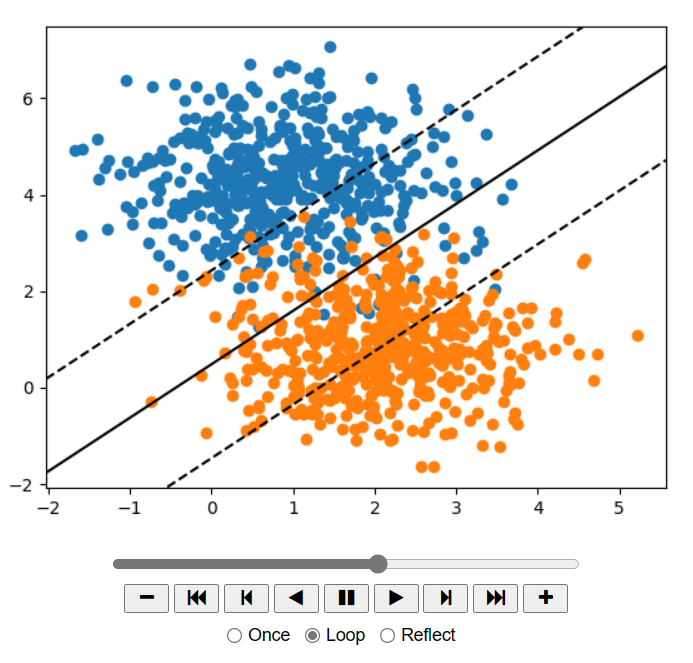

In [ ]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
X[:5], y[:5]
y = np.array(list(map(lambda x: -1 if x==0 else x, y)))
fig, ax = plt.subplots()
for label in [-1,1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])
ejeX = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)

In [26]:
lambdas_est = [cross_validation(X_train, y_train, 5, 'estocastico') for i in range(10)]
errores_est = [i[0] for i in lambdas_est]
lambda_optima_est = lambdas_est[errores_est.index(min(errores_est))][1]

In [27]:
lambda_optima_est

1.8989898989898992

In [28]:
lambdas_est

[(0.23875000000000002, 1.8989898989898992),
 (0.36375, 1.878787878787879),
 (0.42750000000000005, 1.2323232323232325),
 (0.4575, 1.4141414141414144),
 (0.31625, 1.7171717171717173),
 (0.40499999999999997, 1.97979797979798),
 (0.35374999999999995, 1.595959595959596),
 (0.26625, 0.16161616161616163),
 (0.305, 0.5050505050505051),
 (0.38875000000000004, 1.0303030303030305)]

In [29]:
#lista_thetas = SVMGD(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.01, funcion_objetivo, lam=lam_optima)
lista_thetas_est = SGD(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.01, lam=lambda_optima_est, T=150)

In [30]:
lista_thetas_est

[[array([[2.49372498e-05],
         [1.46968088e-05]]),
  array([1.25e-05])],
 [array([[4.07112539e-05],
         [1.06234947e-05]]),
  array([2.5e-05])],
 [array([[ 3.70700928e-05],
         [-1.64852904e-05]]),
  array([1.875e-05])],
 [array([[ 3.59717004e-05],
         [-2.36997726e-05]]),
  array([1.66666667e-05])],
 [array([[ 3.48782486e-05],
         [-2.56864377e-05]]),
  array([1.61458333e-05])],
 [array([[ 3.51306652e-05],
         [-2.55631785e-05]]),
  array([1.625e-05])],
 [array([[ 3.51209498e-05],
         [-2.56334601e-05]]),
  array([1.62326389e-05])],
 [array([[ 3.51233979e-05],
         [-2.56326311e-05]]),
  array([1.6235119e-05])],
 [array([[ 3.5122938e-05],
         [-2.5633386e-05]]),
  array([1.6234809e-05])],
 [array([[ 3.51229023e-05],
         [-2.56335511e-05]]),
  array([1.62347746e-05])],
 [array([[ 3.51229032e-05],
         [-2.56335416e-05]]),
  array([1.6234778e-05])],
 [array([[ 3.51229035e-05],
         [-2.56335418e-05]]),
  array([1.62347783e-05])],


In [31]:
lista_thetas_est = normaliza_linea(lista_thetas_est)


line, = ax.plot([], [], 'k-')
margen1, = ax.plot([], [], 'k--')
margen2, = ax.plot([], [], 'k--')
def anima_est(i):
    separadorY = lista_thetas_est[i][1] + lista_thetas_est[i][0] * ejeX
    margen1Y = lista_thetas_est[i][1] + lista_thetas_est[i][0] * ejeX + (1/lista_thetas_est[i][2])
    margen2Y = lista_thetas_est[i][1] + lista_thetas_est[i][0] * ejeX - (1/lista_thetas_est[i][2])
    line.set_data(ejeX,separadorY)
    margen1.set_data(ejeX,margen1Y)
    margen2.set_data(ejeX,margen2Y)
    return line,  margen1,  margen2,

animacion = animation.FuncAnimation(fig, anima_est, frames=range(len(lista_thetas_est)), interval=100, blit=True)

In [ ]:
rc('animation', html='jshtml')
animacion

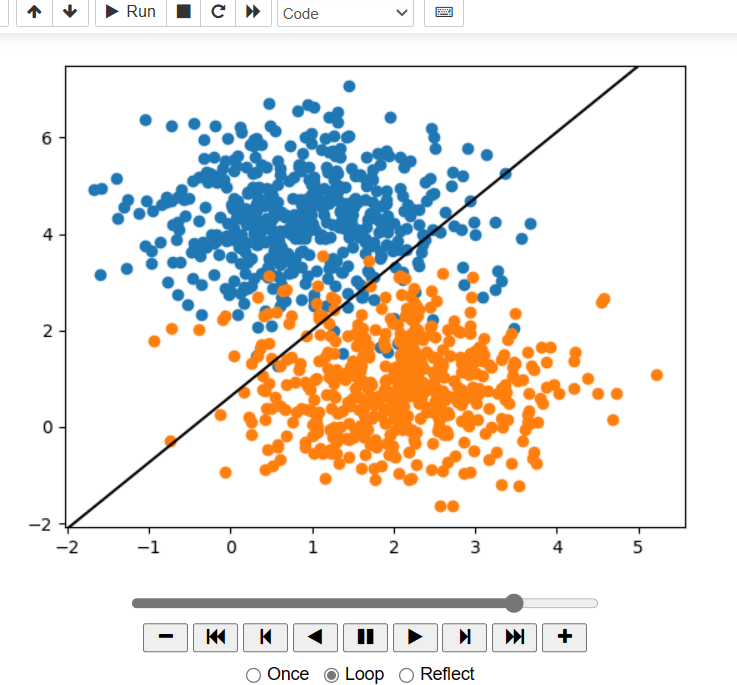